##### 지역별 온도데이터 
https://data.kma.go.kr/

In [1]:
import pandas as pd

In [2]:
try:
    df = pd.read_csv('400_20200411221745769.csv')
except  OSError as err:
    print("OS error: {0}".format(err))
df.head()

,format: day,hour,value location:63_108 Start : 20190401
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [3]:
df.columns

Index([' format: day', 'hour', 'value location:63_108 Start : 20190401 '], dtype='object')

In [4]:
df = df.rename(columns={'value location:63_108 Start : 20190401 ': 'temp'})

In [5]:
df.head()

,format: day,hour,temp
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [6]:
file_name ="new_temperature.csv"
df.to_csv(file_name, encoding='utf-8')

In [7]:
df_temp = df['temp']
df_temp.describe()

count    8784.000000
mean       12.549966
std        10.702835
min       -50.000000
25%         3.800000
50%        12.900000
75%        21.500000
max        36.700001
Name: temp, dtype: float64

In [8]:
df_temp.shape

(8795,)

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [10]:
x = list(range(len(df_temp)))

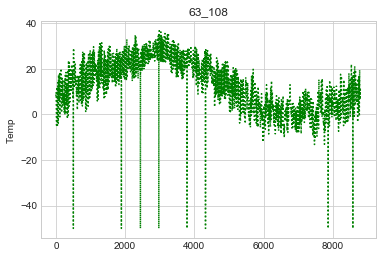

In [11]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

TopN  과  Binning 추가 

In [12]:
df.nlargest(3, columns='temp')

,format: day,hour,temp
2985,3,500.0,36.700001
3032,5,400.0,36.200001
3031,5,300.0,36.000000


In [13]:
df.nsmallest(100, columns='temp')

,format: day,hour,temp
503,21,2300.0,-50.0
1891,18,1700.0,-50.0
2441,11,1400.0,-50.0
2973,2,1700.0,-50.0
3788,5,1500.0,-50.0
...,...,...,...
6336,20,1600.0,-7.7
6507,27,1900.0,-7.7
6701,4,2000.0,-7.7
6703,4,2200.0,-7.7


In [14]:
df_class = pd.cut(df['temp'], bins=[-100, -10, 40], labels=['abnormal', 'normal'])

In [15]:
df_class.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: temp, dtype: category
Categories (2, object): [abnormal < normal]

In [16]:
df_class[df_class =='abnormal'].count()

31

In [17]:
df_class.count()

8784